In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cneos_fireball_data.csv to cneos_fireball_data.csv


In [3]:
fireball = pd.read_csv("cneos_fireball_data.csv")

In [4]:
fireball.head(10)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-10-16 17:14:52,6.5S,65.4W,35.3,19.8,-12.2,14.9,-4.8,3.000000e+10,0.100
1,2023-10-14 22:55:26,8.4S,161.9W,37.0,19.3,19.3,-0.4,-1.3,5.400000e+10,0.180
2,2023-09-28 20:32:35,13.2N,72.4E,37.0,NaN,NaN,NaN,NaN,5.000000e+10,0.160
3,2023-09-07 15:34:46,27.0N,150.8E,NaN,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2023-09-03 04:28:01,43.2S,102.2E,37.0,NaN,NaN,NaN,NaN,2.300000e+10,0.082
5,2023-08-17 05:57:38,48.6N,100.1E,35.4,16.1,6.4,-12.5,-7.8,8.100000e+10,0.250
6,2023-08-05 19:54:50,19.9N,131.7W,44.0,21.8,3.3,20.4,-6.8,1.719000e+12,3.800
7,2023-07-26 03:41:54,18.9N,103.4W,36.1,15.6,-9.5,12.2,1.9,1.510000e+11,0.440
8,2023-07-07 16:15:31,14.5N,126.6W,38.3,25.7,2.6,4.1,-25.2,2.600000e+10,0.092
9,2023-07-06 05:52:31,59.3S,145.4W,71.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100


I would expect that all the data should be numerical except for datetime. It is unclear whether or not the data type is pd.Datetime. Looking at the first ten rows, however, I notice that lat and long have letters in them, which means they could be objects. The strings (N/S/E/W) that represent direction could be replaced by positive or negative numbers instead. All numerical values are continuous.

In [5]:
fireball.dtypes
#lat and long are objects! we must convert them

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                         object
Longitude (deg.)                        object
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [6]:
def convert_lat(latitude):
    if isinstance(latitude, str):
        if 'S' in latitude:
            lat_number = float(latitude.split('S')[0])
            return -lat_number
        if 'N' in latitude:
            lat_number = float(latitude.split('N')[0])
            return lat_number
        else:
            return float(latitude)
    elif isinstance(latitude, float):
        return convert_lat(str(latitude))
    else:
        return latitude

In [7]:
def convert_long(longitude):
  if isinstance(longitude,str):
    if 'W' in longitude:
      long_number = float(longitude.split('W')[0])
      return -long_number
    if 'E' in longitude:
      long_number = float(longitude.split('E')[0])
      return long_number
    else:
      return float(longitude)
  elif isinstance(longitude, float):
    return convert_long(str(longitude))
  else:
    return longitude

In [8]:
fireball['Latitude (deg.)'] = fireball['Latitude (deg.)'].apply(convert_lat)

In [9]:
fireball['Longitude (deg.)'] = fireball['Longitude (deg.)'].apply(convert_long)

In [10]:
fireball

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-10-16 17:14:52,-6.5,-65.4,35.3,19.8,-12.2,14.9,-4.8,3.000000e+10,0.100
1,2023-10-14 22:55:26,-8.4,-161.9,37.0,19.3,19.3,-0.4,-1.3,5.400000e+10,0.180
2,2023-09-28 20:32:35,13.2,72.4,37.0,NaN,NaN,NaN,NaN,5.000000e+10,0.160
3,2023-09-07 15:34:46,27.0,150.8,NaN,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2023-09-03 04:28:01,-43.2,102.2,37.0,NaN,NaN,NaN,NaN,2.300000e+10,0.082
...,...,...,...,...,...,...,...,...,...,...
961,1993-11-29 17:48:41,26.5,78.3,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
962,1993-10-31 03:39:27,51.3,-100.9,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
963,1991-10-04 09:22:47,78.7,6.3,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
964,1990-10-01 03:51:47,7.5,142.8,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [11]:
fireball.dtypes
#now lat and long are floats; we have kept NaN values as they are

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                        float64
Longitude (deg.)                       float64
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [12]:
fireball['Peak Brightness Date/Time (UT)'] = pd.to_datetime(fireball['Peak Brightness Date/Time (UT)'])

The dates are left skewed. There are more records of fireballs since the 2000s. That may be due to technological developments post 2000.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

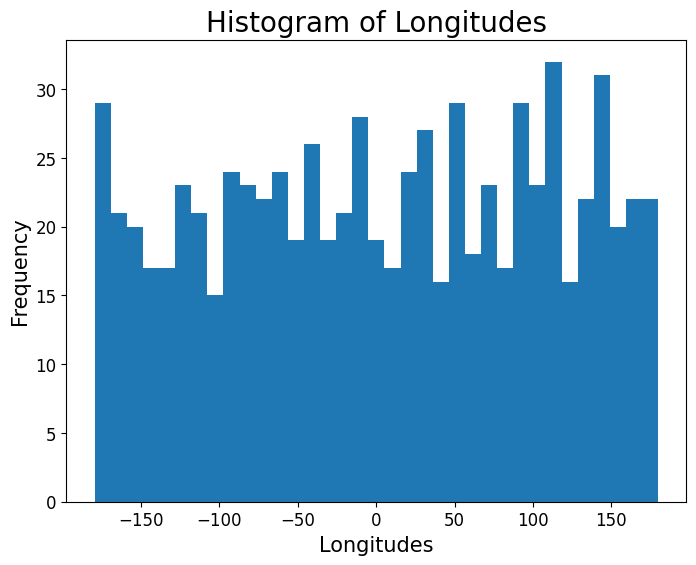

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(fireball['Longitude (deg.)'],35)
plt.title('Histogram of Longitudes',fontsize=20)
plt.xlabel('Longitudes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#make plots wider apart + set titles + labels

The graph is essentially uniform. This makes sense as each longitude has equal area, unlike latitudes. Thus, in theory, each degree of the earth is equally likely to be hit by a fireball.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40'),
  Text(0, 45.0, '45')])

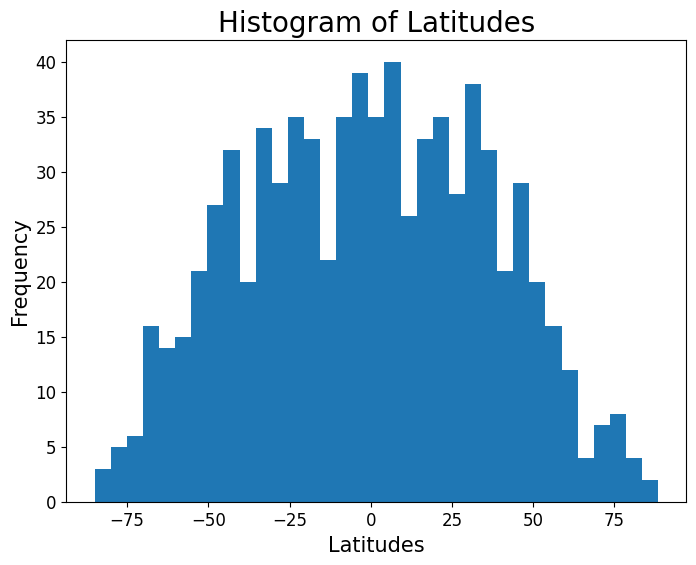

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(fireball['Latitude (deg.)'],35)
plt.title('Histogram of Latitudes',fontsize=20)
plt.xlabel('Latitudes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

It looks like the graph is unimodal and symmetric around the center at the equator. There is a significant reduction in frequency after -50 and 50 degrees. The shape of the graph makes sense there is more surface area near the equator, and thus there is a higher likelihood that fireballs will land there.The weird dips in the histogram are likely a result of the size of the bins.

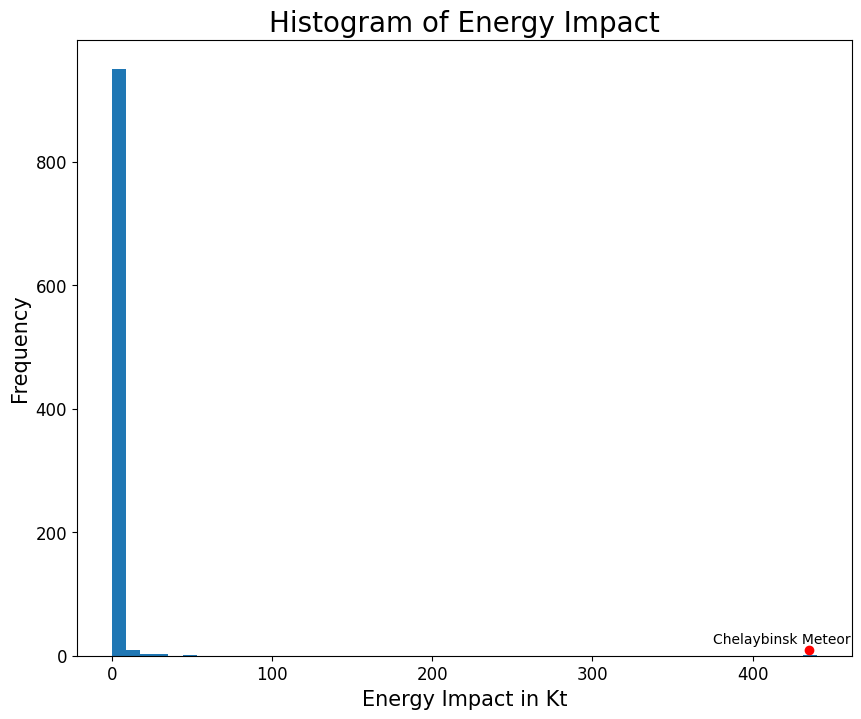

In [33]:
# Calculated Total Impact Energy (kt)
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(fireball['Calculated Total Impact Energy (kt)'],50)
plt.title('Histogram of Energy Impact',fontsize=20)
plt.xlabel('Energy Impact in Kt',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(375,20,'Chelaybinsk Meteor')
plt.scatter(435,10,color='red')

The Chelyabinsk meteor was a 18m wide superbolide that entered Earth's atmosphere over the southern Ural region in Russia on 15 February 2013 and had an impact of 440 kt of energy. The second highest impact is 49, which is the fourth bin on the right. I expected this because most fireballs are not detectable on Earth without proper equipment. I assumed one or two had higher energy impacts that made the news.

In [15]:
fireball['log_energy_impact'] = np.log10(fireball['Calculated Total Impact Energy (kt)'])

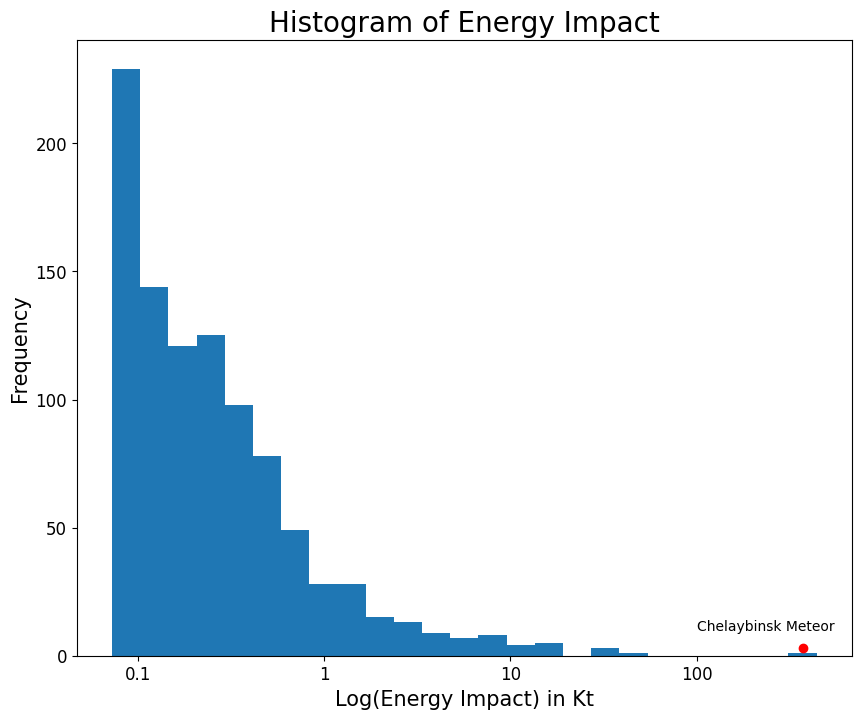

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(fireball['log_energy_impact'],25)
plt.title('Histogram of Energy Impact',fontsize=20)
plt.xlabel('Log(Energy Impact) in Kt',fontsize=15)
regular_x_ticks = [-1,0,1,2]
regular_x_labels = ['0.1', '1', '10', '100']
plt.xticks(regular_x_ticks, regular_x_labels, fontsize=12)
plt.ylabel('Frequency',fontsize=15)
plt.yticks(fontsize=12)
plt.text(2,10,'Chelaybinsk Meteor')
plt.scatter(2.57,3,color='red')

The graph remains unimodal and right skewed, but now we can see the frequency of middle values. Log(440) = 6.08, which still stands out as an outlier. Around 90% of impacts are below 0 log(kt) = 1. See calculation for this claim below.

In [17]:
fireball['log_energy_impact'].loc[fireball['log_energy_impact']<=0].count()/len(fireball)

0.8985507246376812

In [18]:
max(fireball['Longitude (deg.)'])-min(fireball['Longitude (deg.)'])

359.7

In [19]:
%pip install scipy
from scipy.stats import poisson
import scipy

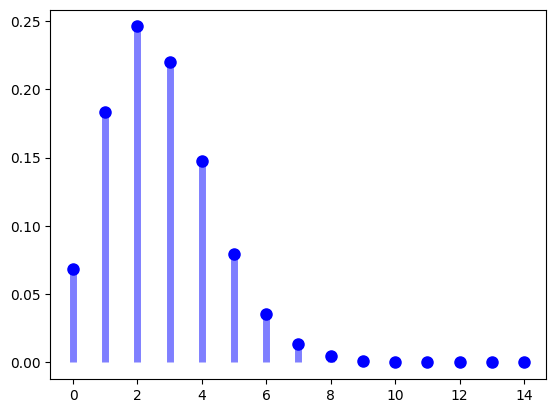

In [20]:
scipy.stats.poisson
mu = len(fireball)/360
x = np.arange(0,15)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Histogram of Longitude Histogram')

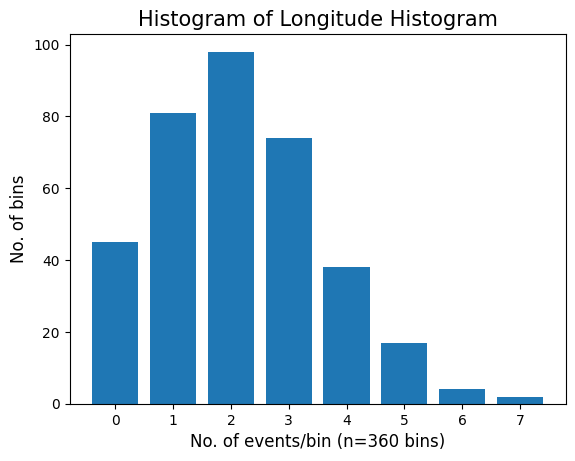

In [21]:
# plt.hist(fireball['Longitude (deg.)'],bins=360)
# plt.title('some title')
c, b = np.histogram(fireball['Longitude (deg.)'], bins = np.arange(min(fireball['Longitude (deg.)']),max(fireball['Longitude (deg.)']),1))
unique, counts = np.unique(c, return_counts=True)
unique, counts, len(counts)
plt.bar(unique, counts)
plt.xlabel("No. of events/bin (n=360 bins)",fontsize=12)
plt.ylabel("No. of bins",fontsize=12)
plt.title("Histogram of Longitude Histogram",fontsize=15)

This is very similar to the poisson distribution, as can be seen through a comparison of the shape of the two graphs. The centre is at 2, which it should be since mu = 2.168. The graph is right tailed and there are essentially no bins with counts larger than 7.